In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from upsetplot import from_contents, plot
from matplotlib import pyplot

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

# Set the font to Arial
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

In [3]:
importance_files = glob.glob(
    "feature_importances/*.tsv"
)

In [4]:
importance_files

['feature_importances/infection_protein_importances.tsv',
 'feature_importances/abdominal_protein_importances.tsv',
 'feature_importances/sst_protein_importances.tsv',
 'feature_importances/lowerresp_protein_importances.tsv',
 'feature_importances/ecoli_protein_importances.tsv',
 'feature_importances/bacteremia_protein_importances.tsv',
 'feature_importances/uti_protein_importances.tsv']

In [5]:

from pathlib import Path

all_importances = []

for importance_file in importance_files:

    path = Path(importance_file)

    panel_type = path.name.split("_")[0]

    importances = pd.read_csv(
        importance_file,
        sep="\t",
    )

    importances['type'] = panel_type

    all_importances.append(importances)


In [6]:
selected_features = pd.concat(
    [importances[['feature', 'type', 'mean_importance']] for importances in all_importances]
)
selected_features

,feature,type,mean_importance
0,FINC_HUMAN,infection,0.832919
1,LBP_HUMAN,infection,0.739269
2,PIGR_HUMAN,infection,0.725587
3,VWF_HUMAN,infection,0.613257
4,FBLN5_HUMAN,infection,0.471938
...,...,...,...
5,PZP_HUMAN,uti,0.474039
6,PTPRG_HUMAN,uti,0.463599
7,FCG3A_HUMAN,uti,0.446211
8,SPP24_HUMAN,uti,0.363481


In [7]:
import colorcet as cc

glasbey_cool = cc.glasbey_warm

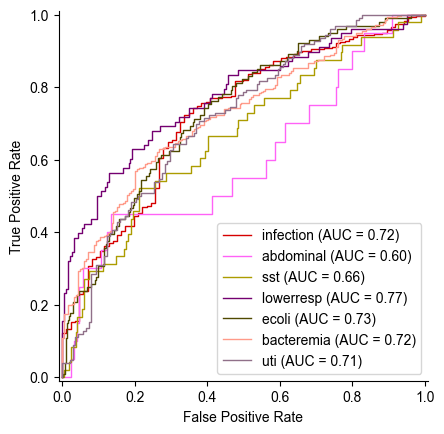

In [8]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import auc

roc_files = glob.glob(
    "roc/*.tsv"
)

from pathlib import Path

fig, ax = plt.subplots()

for i, roc_file in enumerate(roc_files):

    path = Path(roc_file)

    panel_type = path.stem.split("_")[0]

    rocs = pd.read_csv(
        roc_file,
        sep="\t",
    )
    
    roc_curve = RocCurveDisplay(
        fpr=rocs['False Positive Rate'].values.ravel(),
        tpr=rocs['True Positive Rate'].values.ravel(),
        roc_auc=auc(rocs['False Positive Rate'], rocs['True Positive Rate']),
        
    )

    roc_curve.plot(
        c=glasbey_cool[i],
        name=panel_type,
        ax=ax,
        lw=1
    )
    

#fig.set_size_inches((3, 6))
sns.despine()


In [9]:
fig.savefig(
    "infection_rocs.pdf", dpi=300, bbox_inches="tight"
)

In [10]:
feature_types = selected_features['type'].unique()
feature_types

array(['infection', 'abdominal', 'sst', 'lowerresp', 'ecoli',
       'bacteremia', 'uti'], dtype=object)

In [11]:
selected_features['feature'] = selected_features['feature'].str.replace("_HUMAN", "")

In [12]:
selected_features['type'] = selected_features['type'].str.replace("infection", "Infection")
selected_features['type'] = selected_features['type'].str.replace("abdominal", "Abdominal")
selected_features['type'] = selected_features['type'].str.replace("sst", "SST")
selected_features['type'] = selected_features['type'].str.replace("ecoli", "E.coli")
selected_features['type'] = selected_features['type'].str.replace("bacteremia", "Bacteremia")
selected_features['type'] = selected_features['type'].str.replace("uti", "UTI")
selected_features['type'] = selected_features['type'].str.replace("lowerresp", "Lower Resp")

In [13]:
feature_types = [
    'Infection', 
    'Abdominal', 
    'SST', 
    'E.coli', 
    'Bacteremia', 
    'UTI',
    'Lower Resp'
]

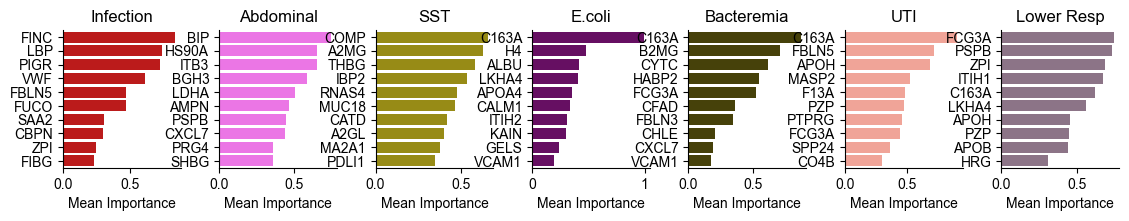

In [14]:
fig, axes = plt.subplots(
    nrows=1, 
    ncols=7, 
    figsize=(21, 3)
)

for i, type in enumerate(feature_types):

    type_data = selected_features[selected_features['type'] == type]

    g = sns.barplot(
        data=type_data,
        x="mean_importance",
        y="feature",
        ax=axes[i],
        color=glasbey_cool[i]
    )
    
    g.set_title(f"{type}")

    g.set_xlabel("Mean Importance")
    g.set_ylabel("")

plt.tight_layout()

sns.despine()



fig.set_size_inches((11, 2))

In [15]:
fig.savefig(
    "infection_importances.pdf", dpi=300, bbox_inches="tight"
)

In [16]:
prediction_files = glob.glob(
    "predictions_test/*.tsv"
)

In [17]:
prediction_files

['predictions_test/infection.tsv',
 'predictions_test/abdominal.tsv',
 'predictions_test/sst.tsv',
 'predictions_test/lowerresp.tsv',
 'predictions_test/ecoli.tsv',
 'predictions_test/bacteremia.tsv',
 'predictions_test/uti.tsv']

In [18]:

from pathlib import Path

all_predictions = []

for prediction_file in prediction_files:

    path = Path(prediction_file)

    panel_type = path.name.split("_")[0]

    predictions = pd.read_csv(
        prediction_file,
        sep="\t",
        index_col=0
    )

    all_predictions.append(predictions)


In [19]:
all_predictions = pd.concat(all_predictions, axis=1)

In [20]:
design_matrix_test = pd.read_csv(
    "../0_data/design_matrix_test.tsv",
    sep='\t'
)

In [21]:
design_matrix_test = design_matrix_test.set_index("injection").join(all_predictions).reset_index()

In [22]:
design_matrix_test.to_csv(
    "design_matrix_test_predictions.tsv",
    sep="\t",
    index=False
)

In [23]:
val_prediction_files = glob.glob(
    "predictions_val/*.tsv"
)

In [24]:
val_prediction_files

['predictions_val/infection.tsv',
 'predictions_val/abdominal.tsv',
 'predictions_val/sst.tsv',
 'predictions_val/lowerresp.tsv',
 'predictions_val/ecoli.tsv',
 'predictions_val/bacteremia.tsv',
 'predictions_val/uti.tsv']

In [25]:

from pathlib import Path

val_all_predictions = []

for val_prediction_file in val_prediction_files:

    path = Path(val_prediction_file)

    panel_type = path.name.split("_")[0]

    val_predictions = pd.read_csv(
        val_prediction_file,
        sep="\t",
        index_col=0
    )

    val_all_predictions.append(val_predictions)


In [26]:
val_all_predictions = pd.concat(val_all_predictions, axis=1)

In [27]:
design_matrix_val = pd.read_csv(
    "../0_data/design_matrix_validation.tsv",
    sep='\t'
)

In [28]:
design_matrix_val = design_matrix_val.set_index("injection").join(val_all_predictions).reset_index()

In [29]:
design_matrix_val.to_csv(
    "design_matrix_val_predictions.tsv",
    sep="\t",
    index=False
)

In [30]:
probability_columns = [
    col for col in design_matrix_test.columns if "probability" in col and "sofa" not in col
]
probability_columns

['infection_probability',
 'abdominal_probability',
 'sst_probability',
 'lowerresp_probability',
 'ecoli_probability',
 'bacteremia_probability',
 'uti_probability']

In [31]:
from umap import UMAP
reducer = UMAP(n_components=2, random_state=42)

components = reducer.fit_transform(design_matrix_test[probability_columns])
design_matrix_test['UMAP 1'] = components[:, 0]
design_matrix_test['UMAP 2'] = components[:, 1]

/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt

cmap = plt.get_cmap('coolwarm')



In [35]:
feature_types

['Infection', 'Abdominal', 'SST', 'E.coli', 'Bacteremia', 'UTI', 'Lower Resp']

In [37]:
probability_columns = [
    'infection_probability',
    'abdominal_probability',
    'sst_probability',
    'ecoli_probability',
    'bacteremia_probability',
    'uti_probability',
    'lowerresp_probability'
]

infection_probability
abdominal_probability
sst_probability
ecoli_probability
bacteremia_probability
uti_probability
lowerresp_probability


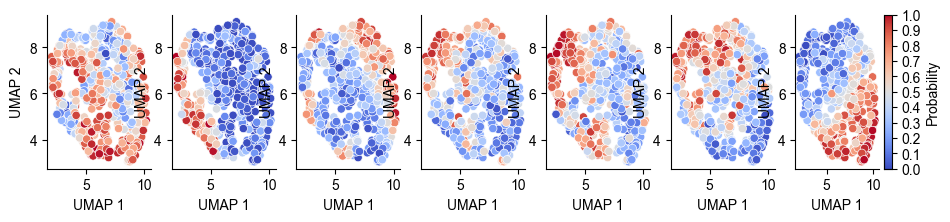

In [38]:
fig, axs = plt.subplots(
    nrows=1, 
    ncols=7, 
    figsize=(21, 3)
)

for ax, prob_col in enumerate(probability_columns):

    print(prob_col)

    g = sns.scatterplot(
        data=design_matrix_test,
        x="UMAP 1",
        y="UMAP 2",
        hue=prob_col,
        palette=cmap,
        ax=axs[ax],
        legend=False
    )

    if ax == 6:

        cbar = fig.colorbar(
            mpl.cm.ScalarMappable(
                norm=mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False), cmap=cmap),
                ticks=np.arange(0.0, 1.0 + 0.1, 0.1),
                label="Probability",
                ax=axs[ax])

    fig.set_size_inches((11, 2))

    sns.despine()

    # fig.savefig(
    #     f"{prob_col}.pdf", dpi=300, bbox_inches="tight"
    # )



In [39]:
fig.savefig(
    f"infection_probability_maps.pdf", dpi=300, bbox_inches="tight"
)
